### Sentence Similarity

Sentence Transformers are a type of transformer model specifically designed for tasks involving sentence-level embeddings. They extend traditional transformer models like BERT, RoBERTa, or DistilBERT to produce dense vector representations (embeddings) of entire sentences or text segments, which can then be used in a variety of natural language processing (NLP) tasks

Sentence Embeddings: Unlike word embeddings that represent individual words, sentence embeddings represent entire sentences as fixed-size dense vectors. These vectors capture the semantic meaning of the sentences, allowing for easy comparison, clustering, or use in downstream tasks.

Transformer Architecture: Sentence Transformers are based on the transformer architecture, which means they use mechanisms like self-attention to process input text. The key difference is how they handle the output to create embeddings for entire sentences.

Pooling Mechanism: To create a fixed-size vector representation for a sentence, Sentence Transformers typically use a pooling operation (mean, max pooling) over the output embeddings from the transformer. This produces a single vector that represents the entire sentence.

Fine-tuning: Sentence Transformers are often fine-tuned on specific sentence-pair tasks (like semantic textual similarity) to make the embeddings more semantically meaningful. This fine-tuning process ensures that sentences with similar meanings are close to each other in the embedding space.

In [1]:
!pip install sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 84.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [2]:
from sentence_transformers import SentenceTransformer
from sentence_transformers import util

https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2

In [3]:
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

model

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:86: UserWarning: 
Access to the secret `HF_TOKEN` has not been granted on this notebook.
You will not be requested again.
Please restart the session if you want to be prompted again.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

SentenceTransformer(
  (0): Transformer({'max_seq_length': 256, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Normalize()
)

In [4]:
sentences = [
    "Visiting Niagara Falls offers a breathtaking experience as you witness the immense power and beauty of the cascading waterfalls, surrounded by mist and the roar of the rushing water.",
    "Experiencing Niagara Falls immerses you in awe as you stand before the thundering cascade, enveloped by the mist and the sheer force of nature's grandeur."
]

sentences

['Visiting Niagara Falls offers a breathtaking experience as you witness the immense power and beauty of the cascading waterfalls, surrounded by mist and the roar of the rushing water.',
 "Experiencing Niagara Falls immerses you in awe as you stand before the thundering cascade, enveloped by the mist and the sheer force of nature's grandeur."]

In [5]:
embeddings = model.encode(sentences)

embeddings

array([[ 3.64989154e-02,  3.11303046e-02,  1.18221872e-01,
         2.47170441e-02, -2.61468031e-02,  5.97946066e-03,
         1.85767692e-02,  2.07341928e-02, -1.92727372e-02,
        -6.25739694e-02, -5.48453964e-02, -4.56530415e-02,
        -4.67325784e-02, -1.76099583e-03, -1.18795820e-02,
         2.89153736e-02,  8.72036070e-03,  3.42073217e-02,
        -4.78532864e-03,  5.73053723e-03,  6.03158809e-02,
        -6.13805987e-02, -6.05752133e-02,  2.78610326e-02,
        -3.15296613e-02,  8.47682580e-02, -4.68714675e-03,
         3.92508171e-02,  4.84027676e-02,  9.44504235e-03,
         3.62973101e-02,  4.17733081e-02, -5.70733324e-02,
         1.04082040e-02,  2.01891139e-02,  8.71434733e-02,
         3.44358757e-02, -4.65665311e-02,  2.10148524e-02,
         3.06859910e-02, -9.91267036e-04,  3.42099629e-02,
         8.42994228e-02,  8.84137899e-02,  3.21156420e-02,
         9.92977433e-03,  3.97588452e-03, -1.43558392e-02,
        -2.20687538e-02,  4.29984145e-02,  5.01121730e-0

Each sentence is represented using a dimensionality of 384

In [6]:
embeddings.shape

(2, 384)

##### cosine similarity

In [7]:
cos_sim = util.cos_sim(embeddings[0], embeddings[1])

cos_sim

tensor([[0.8182]])

In [8]:
sentences = [
    "Savoring a slice of pie is a delightful treat, bursting with sweet flavors and comforting warmth.",
    "Going on a hike fills you with the refreshing thrill of nature and adventure."
]

embeddings = model.encode(sentences)

cos_sim = util.cos_sim(embeddings[0], embeddings[1])

cos_sim

tensor([[0.1783]])

In [9]:
sentences = [
    "The apple pie tasted sweet and warm.",
    "I am especially fond of pumpkin pie in the winter.",
    "The printer hummed softly in the corner.",
    "The printer is acting up again!",
    "The pasta was rich and creamy.",
    "The pasta is especially yummy at the restaurant"
]

sentences

['The apple pie tasted sweet and warm.',
 'I am especially fond of pumpkin pie in the winter.',
 'The printer hummed softly in the corner.',
 'The printer is acting up again!',
 'The pasta was rich and creamy.',
 'The pasta is especially yummy at the restaurant']

In [10]:
embeddings = model.encode(sentences)

embeddings.shape

(6, 384)

In [11]:
cos_sim = util.cos_sim(embeddings, embeddings)

cos_sim

tensor([[1.0000, 0.5262, 0.2570, 0.1223, 0.3508, 0.2535],
        [0.5262, 1.0000, 0.0757, 0.1002, 0.1639, 0.2712],
        [0.2570, 0.0757, 1.0000, 0.5251, 0.2150, 0.1531],
        [0.1223, 0.1002, 0.5251, 1.0000, 0.0890, 0.1314],
        [0.3508, 0.1639, 0.2150, 0.0890, 1.0000, 0.7244],
        [0.2535, 0.2712, 0.1531, 0.1314, 0.7244, 1.0000]])

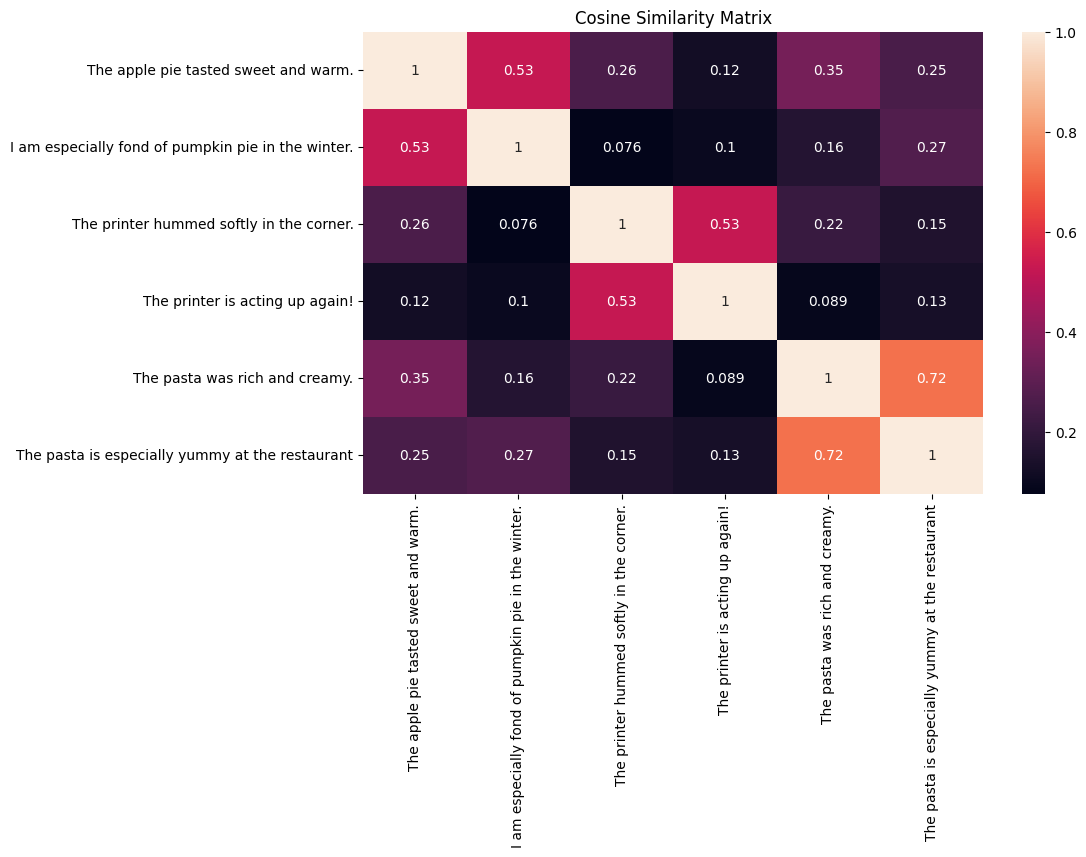

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))

sns.heatmap(cos_sim, annot=True, xticklabels=sentences, yticklabels=sentences)
plt.title("Cosine Similarity Matrix")

plt.show()

In [13]:
def find_most_similar(sentence, sentences):
    query_embedding = model.encode([sentence])[0]
    similarities = util.cos_sim(query_embedding, model.encode(sentences)).numpy()[0]

    similar_sentences = sorted(zip(sentences, similarities), key=lambda x: x[1], reverse=True)

    print(f"Most similar sentences to '{sentence}':")
    for sim_sentence, similarity in similar_sentences:
        print(f"- '{sim_sentence}' with similarity: {similarity:.4f}")

In [14]:
sentences[0]

'The apple pie tasted sweet and warm.'

In [15]:
find_most_similar(sentences[0], sentences[1:])

Most similar sentences to 'The apple pie tasted sweet and warm.':
- 'I am especially fond of pumpkin pie in the winter.' with similarity: 0.5262
- 'The pasta was rich and creamy.' with similarity: 0.3508
- 'The printer hummed softly in the corner.' with similarity: 0.2570
- 'The pasta is especially yummy at the restaurant' with similarity: 0.2535
- 'The printer is acting up again!' with similarity: 0.1223


In [16]:
sentence = "How do I get this printed, do you have a printer?"

find_most_similar(sentence, sentences)

Most similar sentences to 'How do I get this printed, do you have a printer?':
- 'The printer is acting up again!' with similarity: 0.5087
- 'The printer hummed softly in the corner.' with similarity: 0.4524
- 'The pasta is especially yummy at the restaurant' with similarity: 0.0801
- 'The pasta was rich and creamy.' with similarity: 0.0522
- 'I am especially fond of pumpkin pie in the winter.' with similarity: 0.0197
- 'The apple pie tasted sweet and warm.' with similarity: 0.0014


### Clustering

In [17]:
sentences = [
    'Motorcycles are weaving through the traffic.',
    'A train is speeding through the countryside.',
    'Thunder rumbled in the distance.',
    'The sun is shining brightly today.',
    'The freeway is clear during the late evening.',
    'The dog is playfully chasing its own tail.',
    'Snowflakes are falling softly on the ground.',
    'The airplane is soaring high above the clouds.',
    'Cars are honking in the busy street.',
    'Tourists are exploring the ancient ruins.',
    'A puppy is wagging its tail excitedly.',
    'Traffic is backed up for miles on the highway.',
    'Raindrops are gently tapping on the window.',
    'The golden retriever is fetching a stick.',
    'A cool breeze is blowing through the trees.',
    'The red light has slowed the morning commute.',
    'A small dog is barking at a passing car.',
    'The boat is gliding smoothly across the lake.',
    'A fluffy dog is curled up on the couch.',
    'The backpacker is hiking up the mountain trail.'
]


sentences

['Motorcycles are weaving through the traffic.',
 'A train is speeding through the countryside.',
 'Thunder rumbled in the distance.',
 'The sun is shining brightly today.',
 'The freeway is clear during the late evening.',
 'The dog is playfully chasing its own tail.',
 'Snowflakes are falling softly on the ground.',
 'The airplane is soaring high above the clouds.',
 'Cars are honking in the busy street.',
 'Tourists are exploring the ancient ruins.',
 'A puppy is wagging its tail excitedly.',
 'Traffic is backed up for miles on the highway.',
 'Raindrops are gently tapping on the window.',
 'The golden retriever is fetching a stick.',
 'A cool breeze is blowing through the trees.',
 'The red light has slowed the morning commute.',
 'A small dog is barking at a passing car.',
 'The boat is gliding smoothly across the lake.',
 'A fluffy dog is curled up on the couch.',
 'The backpacker is hiking up the mountain trail.']

In [18]:
len(sentences)

20

In [21]:
embeddings = model.encode(sentences)

embeddings.shape

(20, 384)

##### Normalize

np.linalg.norm(embeddings, axis=1, keepdims=True): This part of the code computes the Euclidean norm (also known as the L2 norm) of each embedding vector. The axis=1 parameter means that the norm is computed for each row (i.e., each individual embedding vector). The keepdims=True parameter ensures that the output has the same dimensions as the input, so that it can be used for element-wise division in the next step.

embeddings / ...: Finally, each embedding vector is divided by its corresponding norm. This process is known as normalization, and it scales the embedding vectors so that each vector has a length of 1 (i.e., it resides on a unit sphere).

In [22]:
import numpy as np

embeddings = embeddings /  np.linalg.norm(embeddings, axis=1, keepdims=True)

embeddings

array([[-0.04307288,  0.0186804 , -0.0488638 , ...,  0.08677968,
         0.10682646,  0.0019156 ],
       [ 0.04211079, -0.04277898, -0.01161029, ..., -0.02267956,
         0.10223655,  0.03870734],
       [ 0.05028285,  0.0331008 ,  0.04199443, ..., -0.04830404,
         0.0182565 ,  0.01600058],
       ...,
       [-0.01971704, -0.01902277,  0.01996995, ..., -0.03282704,
         0.05141588,  0.02078618],
       [ 0.03478093, -0.05911597,  0.01768042, ...,  0.05305449,
         0.11628002,  0.06065518],
       [-0.1019492 ,  0.00187655, -0.01312212, ..., -0.04909392,
        -0.00924305, -0.08583876]], dtype=float32)

In [23]:
embeddings.shape

(20, 384)

In [24]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, n_init=10)

kmeans

KMeans(n_clusters=4, n_init=10)

In [25]:
kmeans.fit(embeddings)

KMeans(n_clusters=4, n_init=10)

In [26]:
kmeans.labels_

array([0, 0, 2, 2, 0, 1, 2, 2, 0, 3, 1, 0, 2, 1, 2, 0, 0, 1, 1, 3],
      dtype=int32)

In [27]:
import pandas as pd

df = pd.DataFrame({'Sentence': sentences, 'Cluster': kmeans.labels_})

df

,Sentence,Cluster
0,Motorcycles are weaving through the traffic.,0
1,A train is speeding through the countryside.,0
2,Thunder rumbled in the distance.,2
3,The sun is shining brightly today.,2
4,The freeway is clear during the late evening.,0
5,The dog is playfully chasing its own tail.,1
6,Snowflakes are falling softly on the ground.,2
7,The airplane is soaring high above the clouds.,2
8,Cars are honking in the busy street.,0
9,Tourists are exploring the ancient ruins.,3


In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

reduced_embeddings = pca.fit_transform(embeddings)

reduced_embeddings

array([[-0.44560662, -0.16729958],
       [-0.23053409, -0.2779101 ],
       [-0.03460658,  0.24746378],
       [-0.14613803,  0.24324912],
       [-0.4587846 , -0.14633656],
       [ 0.6160775 , -0.35399035],
       [ 0.04180963,  0.59521186],
       [ 0.0920031 ,  0.39310774],
       [-0.40306294, -0.2762036 ],
       [-0.18540822,  0.07642132],
       [ 0.6124957 , -0.20468555],
       [-0.40364224, -0.41900474],
       [ 0.00714947,  0.52152324],
       [ 0.52184254, -0.1288591 ],
       [-0.02834004,  0.43749756],
       [-0.4491426 , -0.10780758],
       [ 0.16058955, -0.26728567],
       [ 0.11665951, -0.04306049],
       [ 0.5890911 , -0.11882504],
       [ 0.027548  , -0.00320574]], dtype=float32)

In [29]:
reduced_df = pd.DataFrame(reduced_embeddings, columns=['PC1', 'PC2'])

reduced_df['Cluster'] = kmeans.labels_

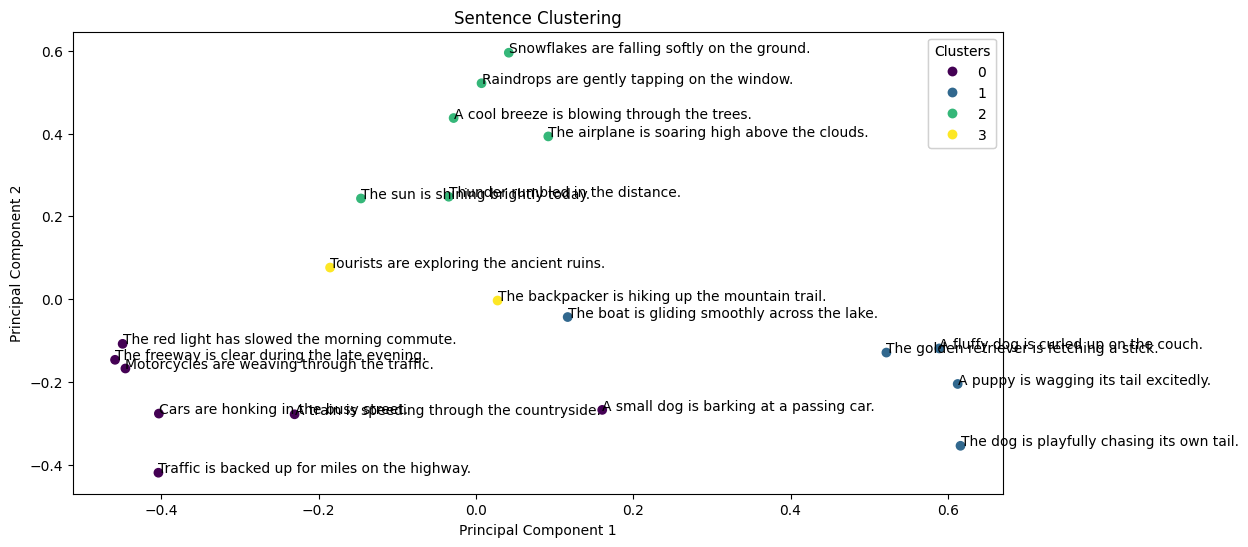

In [30]:
plt.figure(figsize=(12, 6))

scatter = plt.scatter(reduced_df['PC1'], reduced_df['PC2'], c=reduced_df['Cluster'], cmap='viridis')

plt.title('Sentence Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

for i, sentence in enumerate(sentences):
    plt.annotate(sentence, (reduced_df['PC1'][i], reduced_df['PC2'][i]))

legend = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend)

plt.show()